In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [84]:
train_original = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\Loan prediction\train_ctrUa4K.csv")
test_original = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\Loan prediction\test_lAUu6dG.csv")

In [85]:
train = train_original.copy()
test = test_original.copy()

In [86]:
train.shape, test.shape

((614, 13), (367, 12))

In [87]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [89]:
# Columns in train and test dataset are same, so we can predict test using train

In [90]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [91]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [92]:
# Target variable is Loan_Status

train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot: >

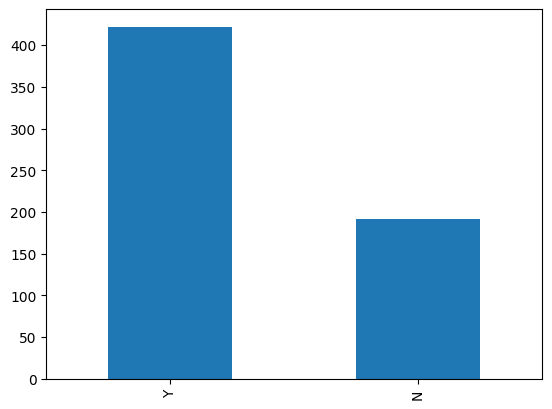

In [93]:
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot: >

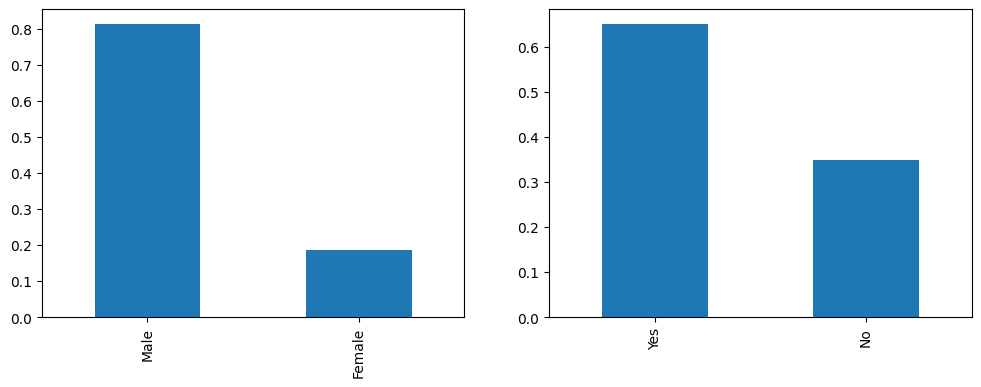

In [94]:
plt.figure(figsize=[12,4])
plt.subplot(121)
train['Gender'].value_counts(normalize=True).plot.bar()
plt.subplot(122)
train['Married'].value_counts(normalize=True).plot.bar()

# About 85% are Men
# About 65% are married

<AxesSubplot: >

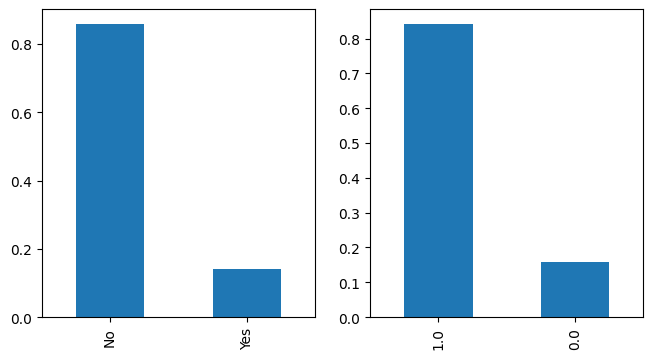

In [95]:
plt.figure(figsize=[12,4])
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar()

plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar()

# About 15% are self- Employed
# Around 85% applicant repaid their loan

<AxesSubplot: >

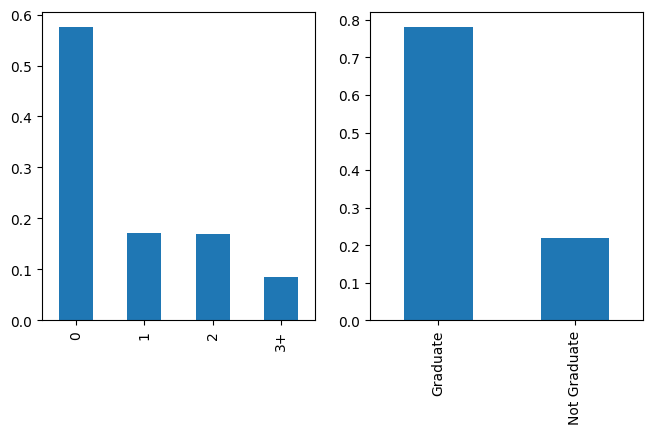

In [96]:
plt.figure(figsize=[12,4])
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar()

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar()

<AxesSubplot: >

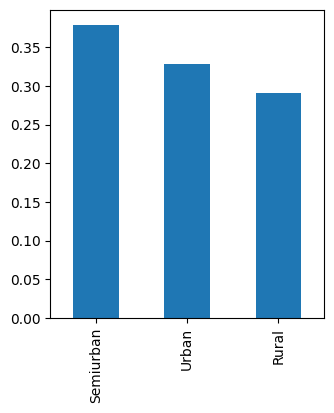

In [97]:
plt.figure(figsize=[12,4])
plt.subplot(131)
train['Property_Area'].value_counts(normalize=True).plot.bar()

<AxesSubplot: >

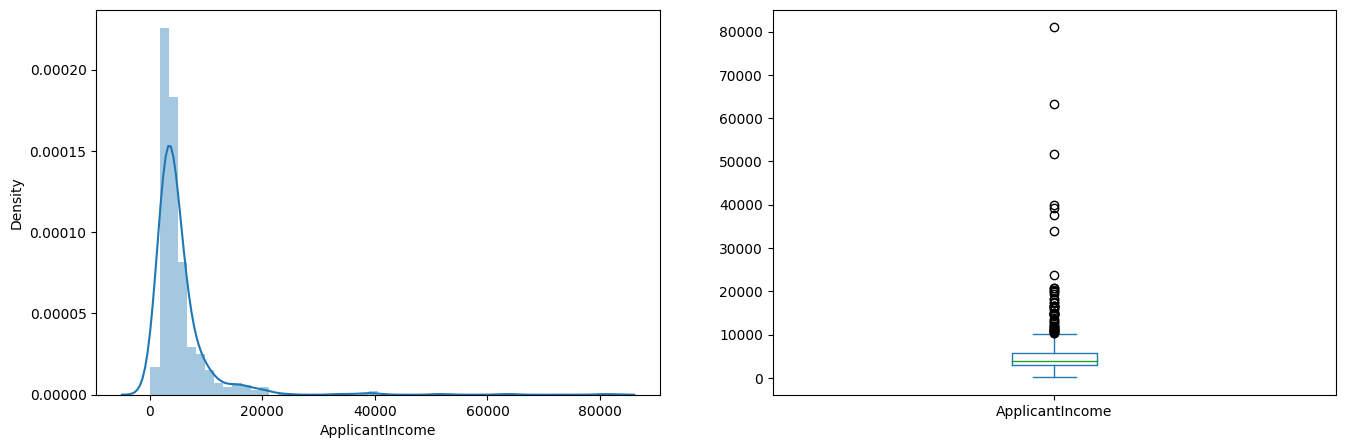

In [98]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

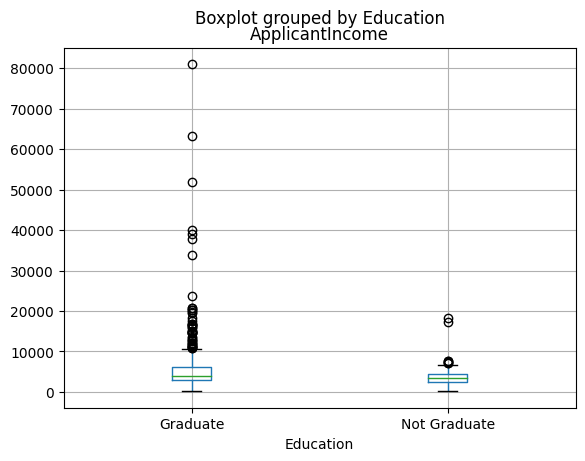

In [99]:
# AppicantIncome is lest sckewed, we will normalize it later

train.boxplot(column='ApplicantIncome', by='Education')


<AxesSubplot: >

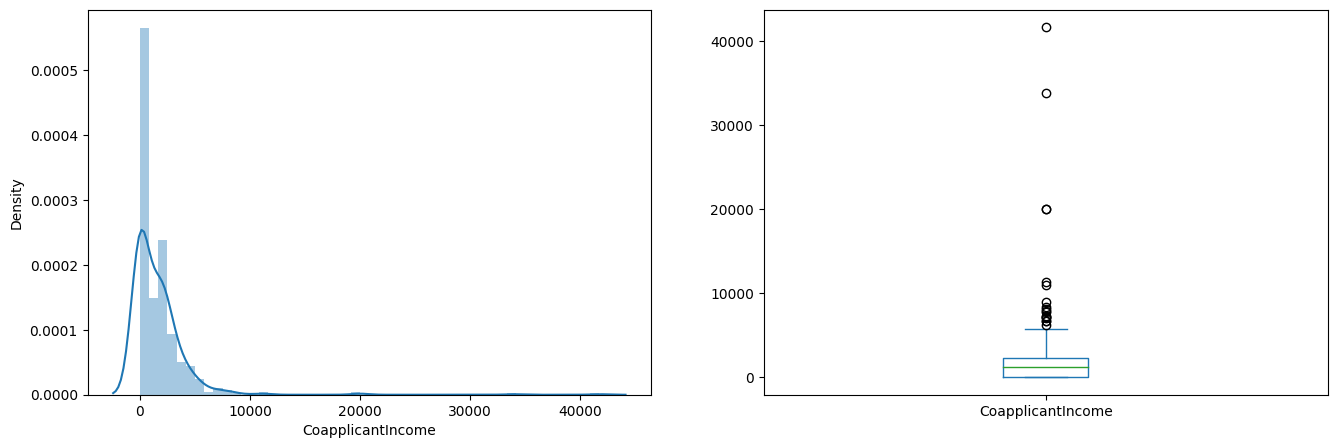

In [100]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))

In [101]:
# There are outliers and data is also not normally distributed

<AxesSubplot: >

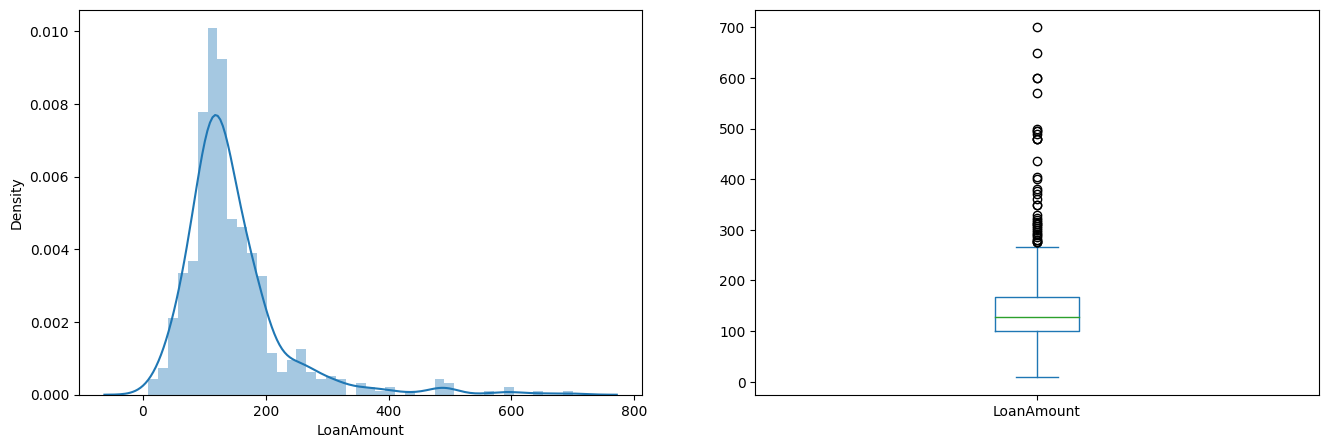

In [102]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['LoanAmount'])
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))

In [103]:
# There are so many outliers and data is normally distributed

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Property_Area'>

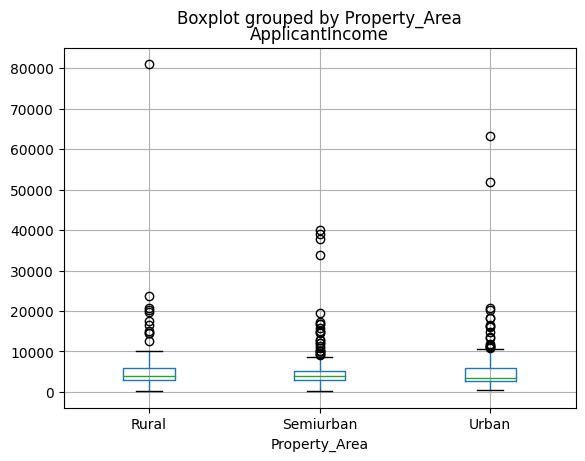

In [104]:
train.boxplot(column='ApplicantIncome', by='Property_Area')

<AxesSubplot: xlabel='Gender'>

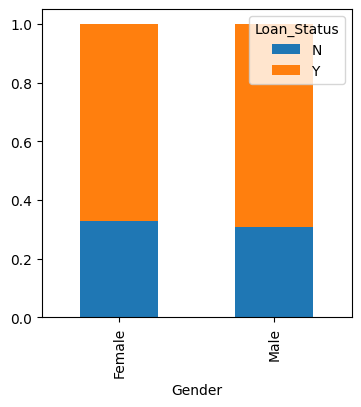

In [105]:
# lets find relation between catgorical variable and target variable

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='Dependents'>

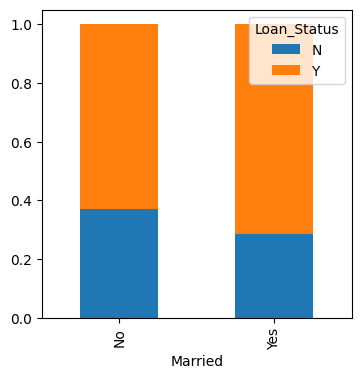

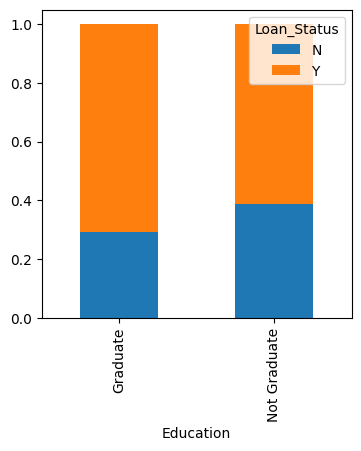

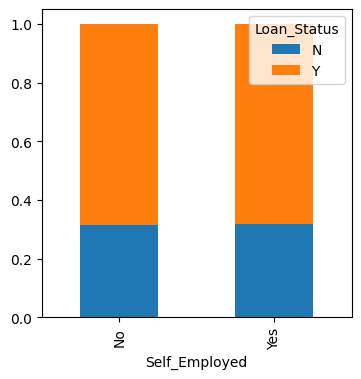

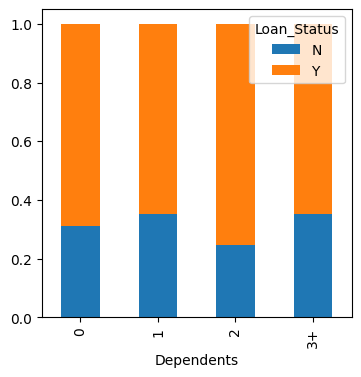

In [106]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='Credit_History'>

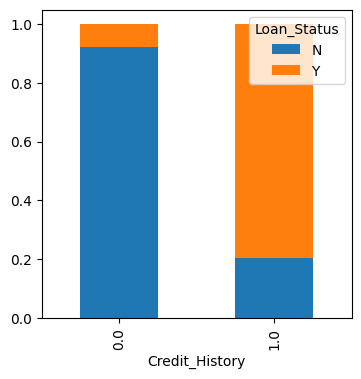

In [107]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='Property_Area'>

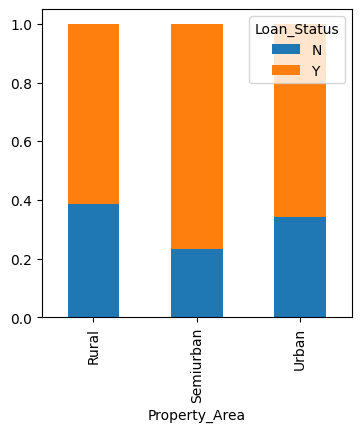

In [108]:
Property_area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Property_area.div(Property_area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='income_bin'>

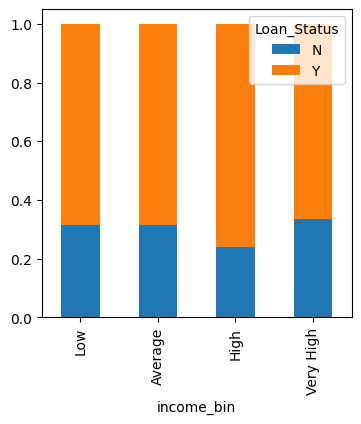

In [109]:
bins =[0,2500,5000,6000,81000]
group =['Low','Average', 'High', 'Very High']
train['income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

income_bin = pd.crosstab(train['income_bin'], train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='income_bin1'>

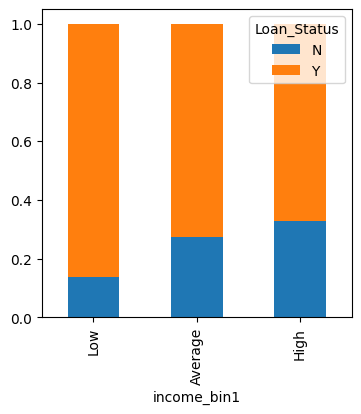

In [110]:
bins =[0,1000,3000,42000]
group =['Low','Average', 'High']
train['income_bin1'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

income_bin1 = pd.crosstab(train['income_bin1'], train['Loan_Status'])
income_bin1.div(income_bin1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='Total_income'>

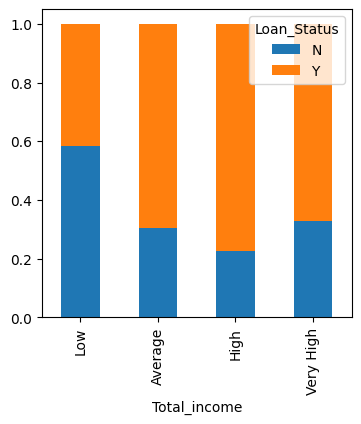

In [111]:
train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins =[0,2500,5000,6000,81000]
group =['Low','Average', 'High', 'Very High']
train['Total_income'] = pd.cut(train['Total_income'], bins, labels=group)

income_bin2 = pd.crosstab(train['Total_income'], train['Loan_Status'])
income_bin2.div(income_bin2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: xlabel='loan_a'>

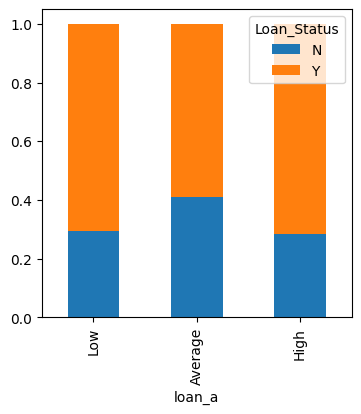

In [112]:
bins =[0,200,400,700]
group =['Low','Average', 'High']
train['loan_a'] = pd.cut(train['LoanAmount'], bins, labels=group)

income_bin4 = pd.crosstab(train['loan_a'], train['Loan_Status'])
income_bin4.div(income_bin4.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot: >

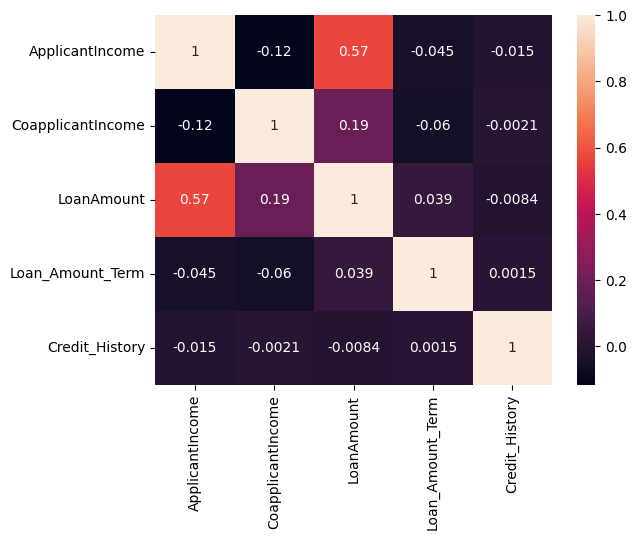

In [113]:
sns.heatmap(train.corr(), annot=True)

In [114]:
# Data Cleaning

train_original.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
test_original.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [116]:
train_original['Gender'].fillna(train_original['Gender'].mode()[0], inplace=True)
train_original['Married'].fillna(train_original['Married'].mode()[0], inplace=True)
train_original['Self_Employed'].fillna(train_original['Self_Employed'].mode()[0], inplace=True)
train_original['Dependents'].fillna(train_original['Dependents'].mode()[0], inplace=True)
train_original['Credit_History'].fillna(train_original['Credit_History'].mode()[0], inplace=True)

train_original['Loan_Amount_Term'].nunique()

10

In [117]:
train_original['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [118]:
train_original['Loan_Amount_Term'].fillna(train_original['Loan_Amount_Term'].mode()[0], inplace=True)

train_original['LoanAmount'].fillna(train_original['LoanAmount'].median(), inplace=True)

In [119]:
train_original.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [120]:
test_original['Gender'].fillna(test_original['Gender'].mode()[0], inplace=True)
test_original['Loan_Amount_Term'].fillna(test_original['Loan_Amount_Term'].mode()[0], inplace=True)
test_original['Self_Employed'].fillna(test_original['Self_Employed'].mode()[0], inplace=True)
test_original['Dependents'].fillna(test_original['Dependents'].mode()[0], inplace=True)
test_original['Credit_History'].fillna(test_original['Credit_History'].mode()[0], inplace=True)
test_original['LoanAmount'].fillna(test_original['LoanAmount'].median(), inplace=True)

In [121]:
test_original.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [122]:
train_original['Log_LoanAmount'] = np.log(train_original['LoanAmount'])
test_original['Log_LoanAmount'] = np.log(test_original['LoanAmount'])

<AxesSubplot: >

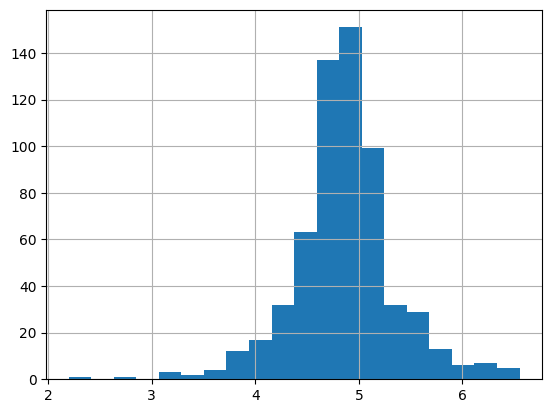

In [123]:
train_original['Log_LoanAmount'].hist(bins=20)

<AxesSubplot: >

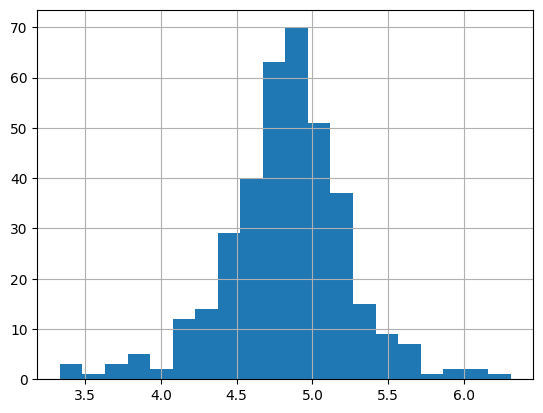

In [124]:
test_original['Log_LoanAmount'].hist(bins=20)

In [125]:

test_original.drop('Loan_ID', axis=1)
train_original.drop('Loan_ID', axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_LoanAmount
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109


In [126]:
X = train_original.drop('Loan_Status',1)
y = train_original.Loan_Status

In [127]:
X = pd.get_dummies(X)
train_original = pd.get_dummies(train_original)
test_new=pd.get_dummies(test_original)


In [133]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_valid)

In [135]:
accuracy_score(y_valid, pred)

0.7945945945945946

In [137]:
test_pred = model.predict(test_original)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Dependents
- Education
- Gender
- Loan_ID
- Married
- ...
Feature names seen at fit time, yet now missing:
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education_Graduate
- ...
